### Stock market prediction using stacked LSTM

### Part 1: Fetching the data and visualizing it

In [109]:
from config import *
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [110]:
## SKIP THIS PART TO USE PRELOADED DATA DIRECTLY
# df = pdr.get_data_tiingo('AAPL', api_key=tiingo_key)
# df.to_csv('AAPL.csv')
# df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-10-17 00:00:00+00:00  160.47  160.87  159.23  159.78  18816438   
       2017-10-18 00:00:00+00:00  159.76  160.71  159.60  160.42  16158659   
       2017-10-19 00:00:00+00:00  155.98  157.08  155.02  156.75  42111326   
       2017-10-20 00:00:00+00:00  156.25  157.75  155.96  156.61  23612246   
       2017-10-23 00:00:00+00:00  156.17  157.69  155.50  156.89  21654461   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-10-17 00:00:00+00:00  38.072044  38.166945  37.777850  37.908339   
       2017-10-18 00:00:00+00:00  37.903594  38.128985  37.865634  38.060181   
       2017-10-19 00:00:00+00:00  37.006776  37.267755  36.779013  37.189462   
       2017-10-20 00:00:00+00:00  37.070835  37.426715  37.002031  37.156246   
       2017-10-23 00:00:00+00:00  37.051855  37.412480  36.892895  37.222677   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-10-17 00:00:00+00:00   75265752      0.0          1.0  
       2017-10-18 00:00:00+00:00   64634636      0.0          1.0  
       2017-10-19 00:00:00+00:00  168445304      0.0          1.0  
       2017-10-20 00:00:00+00:00   94448984      0.0          1.0  
       2017-10-23 00:00:00+00:00   86617844      0.0          1.0

In [112]:
df = pd.read_csv('AAPL.csv')

In [113]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-17 00:00:00+00:00,160.47,160.87,159.23,159.78,18816438,38.072044,38.166945,37.777850,37.908339,75265752,0.0,1.0
1,AAPL,2017-10-18 00:00:00+00:00,159.76,160.71,159.60,160.42,16158659,37.903594,38.128985,37.865634,38.060181,64634636,0.0,1.0
2,AAPL,2017-10-19 00:00:00+00:00,155.98,157.08,155.02,156.75,42111326,37.006776,37.267755,36.779013,37.189462,168445304,0.0,1.0
3,AAPL,2017-10-20 00:00:00+00:00,156.25,157.75,155.96,156.61,23612246,37.070835,37.426715,37.002031,37.156246,94448984,0.0,1.0
4,AAPL,2017-10-23 00:00:00+00:00,156.17,157.69,155.50,156.89,21654461,37.051855,37.412480,36.892895,37.222677,86617844,0.0,1.0


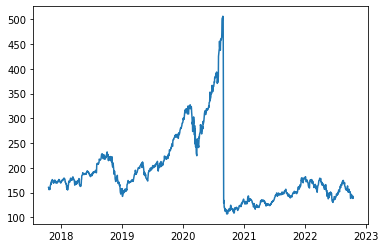

In [114]:
plt.plot(df['date'],df['close'])

This is the data that we shall be using to train our model (closing price of stock on past n no. of days)  

### Part 2: Data Preprocessing (Scaling, Train-Test Split, Preparing)

In [90]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler(feature_range=(0,1))

In [92]:
df1 = scaler.fit_transform(np.array(df['close']).reshape(-1,1))

In [135]:
train_test_ratio = 0.65
training_size = int(len(df1)*train_test_ratio)
testing_size = int(len(df1)*(1-train_test_ratio))
training_data = df1[:training_size]
testing_data = df1[training_size:]

In [136]:
def create_dataset(data,window_size=100):
    X = []
    Y = []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size), 0])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

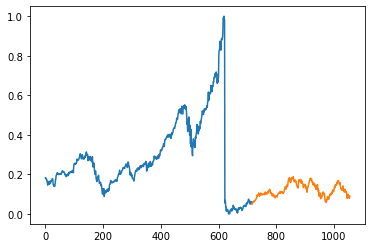

In [137]:
X_train, Y_train = create_dataset(training_data)
X_test, Y_test = create_dataset(testing_data)
plt.plot(Y_train, label='Training Data')
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)),Y_test, label="Test Data")
plt.show()

### Part 3: Prepare the model, configure it and train it

In [138]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [140]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[-2],X_train.shape[-1])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [141]:
model.fit(X_train, Y_train, epochs=60, batch_size=64, verbose=True)

Epoch 1/60
12/12 [==============================] - 4s 78ms/step - loss: 0.0377
Epoch 2/60
12/12 [==============================] - 1s 80ms/step - loss: 0.0160
Epoch 3/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0109
Epoch 4/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0100
Epoch 5/60
12/12 [==============================] - 1s 80ms/step - loss: 0.0088
Epoch 6/60
12/12 [==============================] - 1s 78ms/step - loss: 0.0093
Epoch 7/60
12/12 [==============================] - 1s 76ms/step - loss: 0.0085
Epoch 8/60
12/12 [==============================] - 1s 76ms/step - loss: 0.0077
Epoch 9/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0068
Epoch 10/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0056
Epoch 11/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0073
Epoch 12/60
12/12 [==============================] - 1s 77ms/step - loss: 0.0057
Epoch 13/60
12/12 [==================

### Part 4: Evaluating the results

In [142]:
y_train = scaler.inverse_transform(model.predict(X_train))
y_test = scaler.inverse_transform(model.predict(X_test))

11/11 [==============================] - 0s 18ms/step


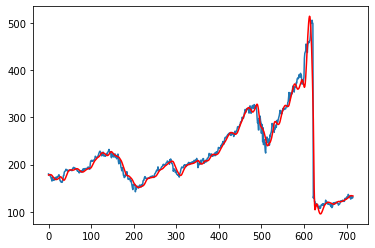

In [143]:
plt.plot(scaler.inverse_transform(Y_train))
plt.plot(y_train, color='red')

#### Model shows great performance on training data, but is it indicative of overfitting ? Let's find out

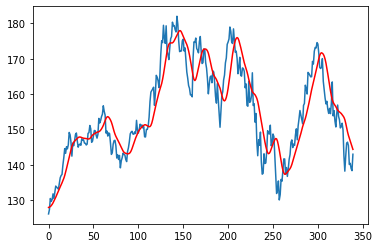

In [144]:
plt.plot(scaler.inverse_transform(Y_test))
plt.plot(range(len(y_test)), y_test, color='red')

##### As we can see, the model performs quite well on the given test set as well. Let's quantify this performance

In [147]:
from sklearn.metrics import mean_squared_error

In [156]:
rmse = np.sqrt(mean_squared_error(y_test,scaler.inverse_transform(Y_test)))

In [159]:
print("Average stock price in testing period = " + str(np.mean(scaler.inverse_transform(Y_test))))
print("Average error percentage = " + str(100 * rmse/np.mean(scaler.inverse_transform(Y_test))))

Average stock price in testing period = 154.87820588235294
Average error percentage = 3.781810558557297


### The model gives an average error of 3.7% while predicting the price in the testing window